# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [83]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [84]:
# Your code here! :)
df = pd.read_csv('C:\\Users\\jimmc\\Downloads\\GermanCredit.csv')
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [85]:
df.isnull().values.any()

False

In [86]:
#Note: 1 = Good and 0 = Bad
target = (df['Class'] == 'Good').values.astype(int)
#target

In [87]:
df_train = df.drop(['Class'],axis=1)
df_train

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,1,0,...,0,0,1,0,1,0,0,1,0,0
996,30,3857,4,4,40,1,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
998,45,1845,4,4,23,1,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0


In [88]:
X_train, X_test, y_train, y_test = train_test_split(df_train.values, target, test_size=0.3, random_state=101)

In [89]:
dtc = DecisionTreeClassifier()
parameters = {
    'criterion': ["gini", "entropy"],
    'max_depth': [4,8,12]
}

cv = GridSearchCV(dtc, parameters, cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12]})

In [90]:
cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [91]:
y_pred = cv.predict(X_test)

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.12      0.22        96
           1       0.71      0.99      0.82       204

    accuracy                           0.71       300
   macro avg       0.75      0.56      0.52       300
weighted avg       0.74      0.71      0.63       300



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [93]:
! pip install dtreeviz

You should consider upgrading via the 'c:\users\jimmc\python\python39\python.exe -m pip install --upgrade pip' command.


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [94]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [95]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin\\"

In [96]:
# Your code here! :)
from dtreeviz.trees import *
viz = dtreeviz(dtc, X_train, y_train, target_name='Class',
              feature_names=df_train.columns,
              class_names=['Bad',"Good"])
viz.save("C:\\Users\\jimmc\\Downloads\\decision_tree_viz.svg")
viz.view()
#Image(viz.topng())

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
# Your code here! :)
rfc = RandomForestClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ["gini", "entropy"],
    'max_depth': [4,8,12]
    
}

cv = GridSearchCV(rfc, parameters, cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12],
                         'n_estimators': [50, 100, 150, 200]})

In [99]:
cv.best_estimator_

RandomForestClassifier(max_depth=12, n_estimators=200)

In [100]:
y_pred = cv.predict(X_test)

In [101]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.30      0.43        96
           1       0.74      0.95      0.83       204

    accuracy                           0.74       300
   macro avg       0.73      0.62      0.63       300
weighted avg       0.74      0.74      0.70       300



In [103]:
cv.best_estimator_.feature_importances_

array([0.08007316, 0.09209475, 0.0355885 , 0.03173445, 0.07696744,
       0.01944257, 0.01093124, 0.01733437, 0.00403011, 0.04436645,
       0.01883378, 0.00756054, 0.05909621, 0.01111263, 0.0163417 ,
       0.01334698, 0.0078607 , 0.0209537 , 0.01459637, 0.00944019,
       0.01270373, 0.01130668, 0.00246656, 0.0037221 , 0.00737676,
       0.        , 0.00092095, 0.01096827, 0.00190818, 0.0234733 ,
       0.007393  , 0.00597675, 0.00324511, 0.01710394, 0.0113767 ,
       0.01262893, 0.01344755, 0.01174541, 0.00990069, 0.01003313,
       0.01548297, 0.01484196, 0.0066028 , 0.        , 0.00861563,
       0.00688191, 0.00874991, 0.01467205, 0.0159606 , 0.01466666,
       0.01155755, 0.01255953, 0.00578934, 0.01337155, 0.01442408,
       0.0136175 , 0.00679831, 0.00298583, 0.01311545, 0.01721832,
       0.01268443])

As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [104]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np 

Text(0, 0.5, 'Mean decrease in impurity')

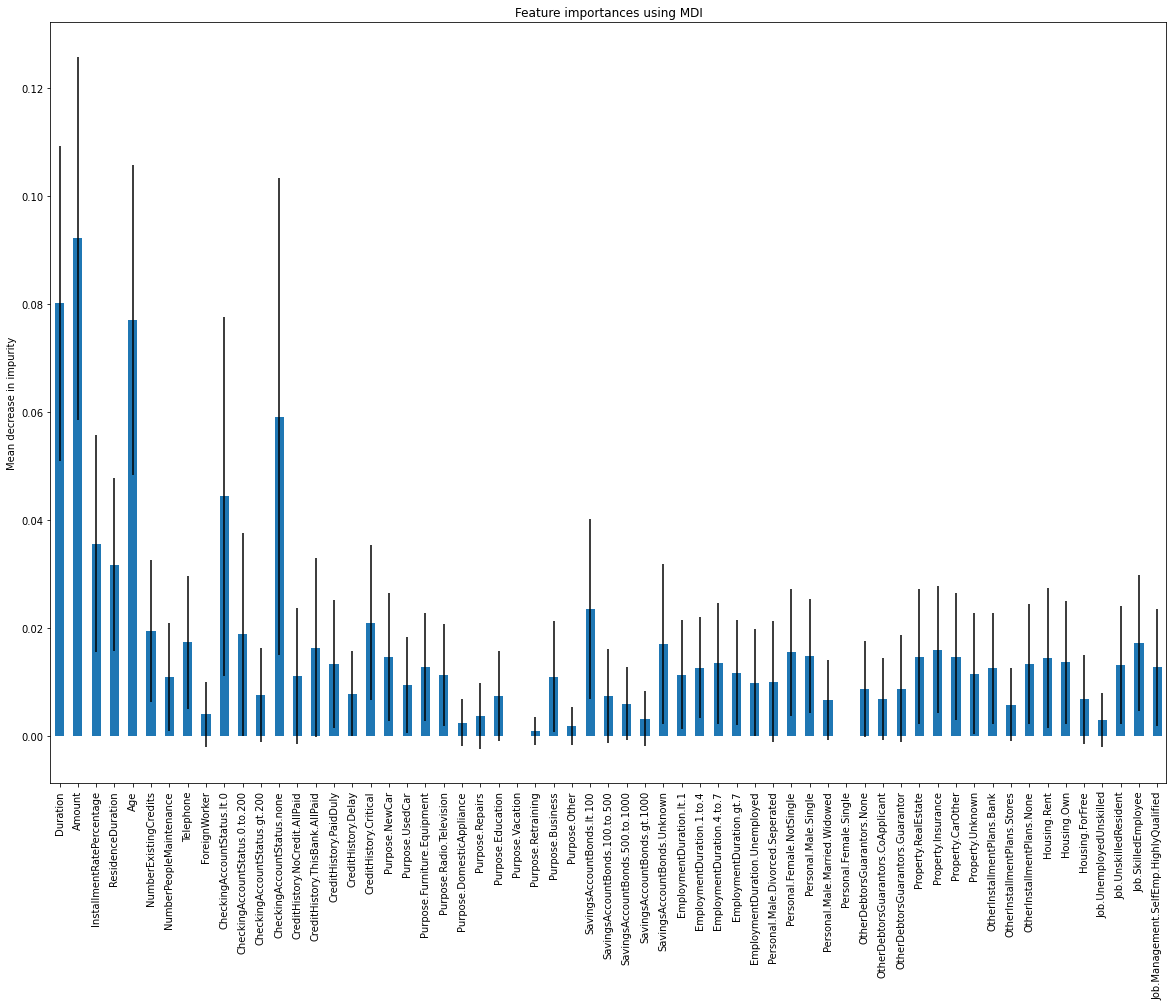

In [105]:
importances = cv.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in cv.best_estimator_.estimators_], axis=0)

forest_importances = pd.Series(importances, index=df_train.columns)

fig, ax = plt.subplots(figsize=(20,14))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

#fig.tight_layout()

In [106]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    cv.best_estimator_, X_test, y_test, n_repeats=10, random_state=101, n_jobs=2
)

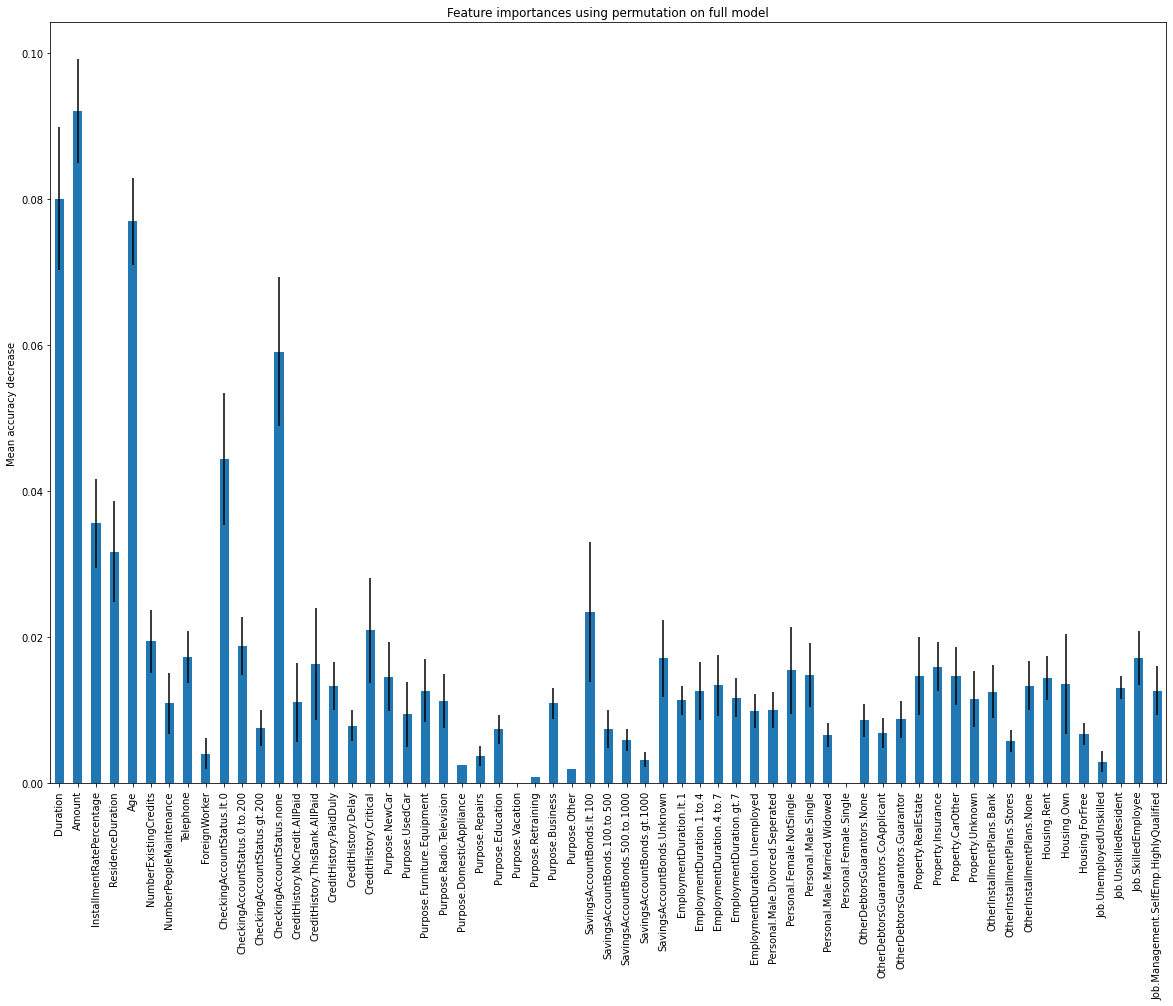

In [107]:
fig, ax = plt.subplots(figsize=(20,14))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
#fig.tight_layout()
plt.show()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [108]:
! pip install pdpbox

  Using cached PDPbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\jimmc\python\python39\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\jimmc\\AppData\\Local\\Temp\\pip-install-cpmghy97\\matplotlib_08e773a3bba4453cb4c5c7d16605731b\\setup.py'"'"'; __file__='"'"'C:\\Users\\jimmc\\AppData\\Local\\Temp\\pip-install-cpmghy97\\matplotlib_08e773a3bba4453cb4c5c7d16605731b\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\jimmc\AppData\Local\Temp\pip-wheel-708cw9zk'


  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\jimmc\python\python39\lib\site-packages\__pycache__\pylab.cpython-39.pyc
   from C:\Users\jimmc\AppData\Local\Temp\pip-uninstall-udhnspzr\pylab.cpython-39.pyc
  Moving to c:\users\jimmc\python\python39\lib\site-packages\matplotlib-3.4.2-py3.9-nspkg.pth
   from C:\Users\jimmc\AppData\Local\Temp\pip-uninstall-1holyn_r\matplotlib-3.4.2-py3.9-nspkg.pth
  Moving to c:\users\jimmc\python\python39\lib\site-packages\matplotlib-3.4.2.dist-info\
   from C:\Users\jimmc\Python\Python39\Lib\site-packages\~atplotlib-3.4.2.dist-info
  Moving to c:\users\jimmc\python\python39\lib\site-pa

       cwd: C:\Users\jimmc\AppData\Local\Temp\pip-install-cpmghy97\matplotlib_08e773a3bba4453cb4c5c7d16605731b\
  Complete output (505 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
        python: yes [3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC
                    v.1928 64 bit (AMD64)]]
      platform: yes [win32]
  
  OPTIONAL SUBPACKAGES
   sample_data: yes [installing]
         tests: no  [skipping due to configuration]
  
  OPTIONAL BACKEND EXTENSIONS
           agg: yes [installing]
         tkagg: yes [installing; run-time loading from Python Tcl/Tk]
        macosx: no  [Mac OS-X only]
  
  OPTIONAL PACKAGE DATA
          dlls: no  [skipping due to configuration]
  
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  copying lib\pylab.py -> build\lib.win-amd64-3.9
  creating build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\afm.py -> build

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

In [109]:
# I am having issues installing pdpbox; also i keep getting a 404 when trying to get on the blog post


  copying lib\matplotlib\mpl-data\images\hand.gif -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\images\move.pdf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\fonts\afm\pncbi8a.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\afm
  copying lib\matplotlib\mpl-data\fonts\afm\cmex10.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\afm
  copying lib\matplotlib\mpl-data\images\zoom_to_rect.svg -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
  copying lib\matplotlib\mpl-data\fonts\afm\putb8a.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\afm
  copying lib\matplotlib\mpl-data\stylelib\_classic_test.mplstyle -> build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
  copying lib\matplotlib\mpl-data\fonts\afm\psyr.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\afm
  copying lib\matplotlib\mpl-data\images\qt4_editor_options_large.png -> build\lib.win-amd64-3.9\matplotlib\mpl

    copying lib\matplotlib\backends\backend_agg.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_cairo.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_gtk3.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_gtk3agg.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_gtk3cairo.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_macosx.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_mixed.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_nbagg.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_pdf.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_pgf.py -> build\lib.win-amd64-3.9\matplotlib\backends


## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
! conda install -c anaconda py-xgboost

In [ ]:
! conda install -c conda-forge catboost

In [ ]:
! conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

In [110]:
import xgboost as xgb
# read in data
#dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
#dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
#dtrain
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
#num_round = 2
#bst = xgb.train(param, dtrain, num_round)
# make prediction
#preds = bst.predict(dtest)

    copying lib\matplotlib\mpl-data\images\back_large.gif -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
    copying lib\matplotlib\mpl-data\images\help_large.ppm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
    copying lib\matplotlib\mpl-data\fonts\ttf\STIXGeneralItalic.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
    copying lib\matplotlib\mpl-data\images\help.ppm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
    copying lib\matplotlib\mpl-data\fonts\pdfcorefonts\Symbol.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\pdfcorefonts
    copying lib\matplotlib\mpl-data\fonts\pdfcorefonts\Times-Italic.afm -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\pdfcorefonts
    copying lib\matplotlib\mpl-data\images\hand_large.gif -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
    copying lib\matplotlib\mpl-data\images\zoom_to_rect.pdf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
    copying lib\matplotlib\mpl-data\images\matplo

In [111]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

    copying lib\matplotlib\mpl-data\stylelib\dark_background.mplstyle -> build\lib.win-amd64-3.9\matplotlib\mpl-data\stylelib
    copying lib\matplotlib\backends\web_backend\js\mpl.js -> build\lib.win-amd64-3.9\matplotlib\backends\web_backend\js
    copying lib\matplotlib\mpl-data\fonts\ttf\cmmi10.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
    copying lib\matplotlib\mpl-data\sample_data\Minduka_Present_Blue_Pack.png -> build\lib.win-amd64-3.9\matplotlib\mpl-data\sample_data
    copying lib\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
    copying lib\matplotlib\mpl-data\fonts\ttf\STIXGeneralBol.ttf -> build\lib.win-amd64-3.9\matplotlib\mpl-data\fonts\ttf
    copying lib\matplotlib\mpl-data\images\move.png -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
    copying lib\matplotlib\mpl-data\images\matplotlib.svg -> build\lib.win-amd64-3.9\matplotlib\mpl-data\images
    copying lib\matplotlib\backends\web_backe

In [112]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

num_round = 10
bst = xgb.train(param, dtrain, num_round)

In [113]:
ypred = bst.predict(dtest)

In [114]:
ypred

array([0.43594098, 0.89860696, 0.5684431 , 0.780877  , 0.4570289 ,
       0.29164436, 0.9029335 , 0.97297466, 0.4615001 , 0.99671006,
       0.8098182 , 0.8321264 , 0.97716695, 0.30843076, 0.7473195 ,
       0.34416208, 0.9691282 , 0.8822595 , 0.62975454, 0.7989358 ,
       0.05793872, 0.7663016 , 0.89088106, 0.8675795 , 0.26652238,
       0.714842  , 0.08776409, 0.9636677 , 0.82401633, 0.9837308 ,
       0.56949836, 0.9345752 , 0.9576812 , 0.59615034, 0.4202973 ,
       0.34766537, 0.79834145, 0.98314255, 0.98879737, 0.8146592 ,
       0.95909715, 0.1710914 , 0.05838473, 0.3354765 , 0.7031229 ,
       0.9009765 , 0.9029335 , 0.9050683 , 0.40096194, 0.97554135,
       0.7905021 , 0.6399967 , 0.7710047 , 0.22529358, 0.85468024,
       0.8246184 , 0.89111763, 0.3055908 , 0.97596824, 0.88834685,
       0.31645286, 0.48979276, 0.93028295, 0.40064576, 0.97652674,
       0.38860363, 0.9850055 , 0.9320014 , 0.9336795 , 0.74602807,
       0.38072053, 0.9618269 , 0.5954122 , 0.9469383 , 0.47799

#?????? this seems very weird for the prediction outputs; guessing this is doing a regression prediction instead of classification or these are probabilites 

## XGBoost Using sklearn API

In [72]:
from xgboost import XGBClassifier

In [73]:
# Your code here! :)
xgbc = XGBClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4,8,12],
    'subsample': [.25,.5,.75,1],
    'colsample_bytree': [.25,.5,.75,1]
    
}

cv = GridSearchCV(xgbc, parameters, cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [74]:
cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [75]:
y_pred = cv.predict(X_test)

In [76]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.44      0.51        96
           1       0.77      0.87      0.81       204

    accuracy                           0.73       300
   macro avg       0.69      0.65      0.66       300
weighted avg       0.72      0.73      0.72       300



In [78]:
cv.best_estimator_.feature_importances_

array([0.01380999, 0.01108143, 0.01278762, 0.00966688, 0.01147495,
       0.0097376 , 0.01290824, 0.01044656, 0.        , 0.01094599,
       0.01057144, 0.02061754, 0.0402566 , 0.01117142, 0.05535842,
       0.01164971, 0.01796239, 0.02135482, 0.01475375, 0.05226211,
       0.01035165, 0.0115521 , 0.        , 0.        , 0.05079659,
       0.        , 0.        , 0.03317277, 0.        , 0.01791038,
       0.02256161, 0.01402047, 0.        , 0.02556012, 0.01182156,
       0.01315231, 0.02916305, 0.00918974, 0.02091573, 0.02620628,
       0.01161764, 0.01256443, 0.01230561, 0.        , 0.03766215,
       0.03492719, 0.04660432, 0.01036403, 0.01452223, 0.01098013,
       0.02994393, 0.01564586, 0.01813614, 0.0100898 , 0.01426847,
       0.00925885, 0.02081379, 0.        , 0.01486909, 0.00961733,
       0.01061716], dtype=float32)

## Cat Boost with sklearn

In [115]:
from catboost import CatBoostClassifier

In [116]:
# Your code here! :)
cbc = CatBoostClassifier()
parameters = {
    'depth': [4,8,12],
    'loss_function': ['Logloss'],
    'n_estimators': [50, 100, 150, 200]
    'verbose':[False],
    'silent'
}

cv = GridSearchCV(cbc, parameters, cv=5)
cv.fit(X_train,y_train)

Learning rate set to 0.125445
0:	learn: 0.6458565	total: 1.93ms	remaining: 94.6ms
1:	learn: 0.6132183	total: 3.7ms	remaining: 88.9ms
2:	learn: 0.5937563	total: 6.36ms	remaining: 99.6ms
3:	learn: 0.5775041	total: 7.87ms	remaining: 90.5ms
4:	learn: 0.5643062	total: 9.4ms	remaining: 84.7ms
5:	learn: 0.5531594	total: 10.9ms	remaining: 80.1ms
6:	learn: 0.5392333	total: 12.5ms	remaining: 76.8ms
7:	learn: 0.5303644	total: 14.2ms	remaining: 74.5ms
8:	learn: 0.5166934	total: 15.7ms	remaining: 71.7ms
9:	learn: 0.5094480	total: 18.2ms	remaining: 72.8ms
10:	learn: 0.5015182	total: 21.2ms	remaining: 75.2ms
11:	learn: 0.4940180	total: 23ms	remaining: 72.8ms
12:	learn: 0.4901576	total: 24.8ms	remaining: 70.6ms
13:	learn: 0.4790868	total: 28.1ms	remaining: 72.2ms
14:	learn: 0.4721161	total: 30ms	remaining: 69.9ms
15:	learn: 0.4662058	total: 34.8ms	remaining: 73.9ms
16:	learn: 0.4587918	total: 36.5ms	remaining: 70.8ms
17:	learn: 0.4541248	total: 38.2ms	remaining: 68ms
18:	learn: 0.4501564	total: 40.1ms

11:	learn: 0.4834122	total: 15.9ms	remaining: 50.3ms
12:	learn: 0.4788663	total: 17.3ms	remaining: 49.3ms
13:	learn: 0.4728049	total: 18.8ms	remaining: 48.3ms
14:	learn: 0.4691242	total: 20.2ms	remaining: 47.1ms
15:	learn: 0.4604056	total: 21.5ms	remaining: 45.6ms
16:	learn: 0.4571651	total: 22.8ms	remaining: 44.2ms
17:	learn: 0.4515406	total: 24.1ms	remaining: 42.9ms
18:	learn: 0.4444243	total: 25.4ms	remaining: 41.5ms
19:	learn: 0.4395271	total: 26.7ms	remaining: 40ms
20:	learn: 0.4328613	total: 28ms	remaining: 38.7ms
21:	learn: 0.4251766	total: 29.3ms	remaining: 37.3ms
22:	learn: 0.4220788	total: 30.7ms	remaining: 36ms
23:	learn: 0.4162613	total: 32.3ms	remaining: 34.9ms
24:	learn: 0.4137414	total: 33.8ms	remaining: 33.8ms
25:	learn: 0.4087928	total: 35.2ms	remaining: 32.5ms
26:	learn: 0.4033862	total: 37.9ms	remaining: 32.3ms
27:	learn: 0.4004678	total: 39.3ms	remaining: 30.9ms
28:	learn: 0.3967032	total: 40.7ms	remaining: 29.4ms
29:	learn: 0.3923219	total: 42ms	remaining: 28ms
30:

16:	learn: 0.4934296	total: 28ms	remaining: 137ms
17:	learn: 0.4887893	total: 29.4ms	remaining: 134ms
18:	learn: 0.4852643	total: 30.7ms	remaining: 131ms
19:	learn: 0.4816075	total: 31.9ms	remaining: 128ms
20:	learn: 0.4786229	total: 33.2ms	remaining: 125ms
21:	learn: 0.4748798	total: 34.4ms	remaining: 122ms
22:	learn: 0.4721753	total: 35.8ms	remaining: 120ms
23:	learn: 0.4702975	total: 37ms	remaining: 117ms
24:	learn: 0.4679110	total: 38.3ms	remaining: 115ms
25:	learn: 0.4645077	total: 39.6ms	remaining: 113ms
26:	learn: 0.4595754	total: 40.9ms	remaining: 111ms
27:	learn: 0.4566575	total: 42.3ms	remaining: 109ms
28:	learn: 0.4528453	total: 43.6ms	remaining: 107ms
29:	learn: 0.4502708	total: 44.9ms	remaining: 105ms
30:	learn: 0.4479288	total: 46.2ms	remaining: 103ms
31:	learn: 0.4462609	total: 47.5ms	remaining: 101ms
32:	learn: 0.4444780	total: 48.9ms	remaining: 99.3ms
33:	learn: 0.4426021	total: 50.2ms	remaining: 97.5ms
34:	learn: 0.4392384	total: 51.5ms	remaining: 95.7ms
35:	learn: 0.

91:	learn: 0.3574968	total: 135ms	remaining: 11.8ms
92:	learn: 0.3566289	total: 137ms	remaining: 10.3ms
93:	learn: 0.3550032	total: 138ms	remaining: 8.8ms
94:	learn: 0.3531654	total: 139ms	remaining: 7.33ms
95:	learn: 0.3509087	total: 141ms	remaining: 5.86ms
96:	learn: 0.3500296	total: 142ms	remaining: 4.39ms
97:	learn: 0.3481065	total: 143ms	remaining: 2.92ms
98:	learn: 0.3463240	total: 144ms	remaining: 1.46ms
99:	learn: 0.3445896	total: 146ms	remaining: 0us
Learning rate set to 0.066437
0:	learn: 0.6647710	total: 1.38ms	remaining: 136ms
1:	learn: 0.6417364	total: 2.66ms	remaining: 130ms
2:	learn: 0.6225724	total: 3.92ms	remaining: 127ms
3:	learn: 0.6104078	total: 5.23ms	remaining: 125ms
4:	learn: 0.5992610	total: 6.46ms	remaining: 123ms
5:	learn: 0.5831866	total: 7.79ms	remaining: 122ms
6:	learn: 0.5707827	total: 9.08ms	remaining: 121ms
7:	learn: 0.5619603	total: 10.3ms	remaining: 119ms
8:	learn: 0.5511479	total: 11.6ms	remaining: 118ms
9:	learn: 0.5442757	total: 12.9ms	remaining: 11

0:	learn: 0.6748201	total: 2.87ms	remaining: 428ms
1:	learn: 0.6579754	total: 5.66ms	remaining: 419ms
2:	learn: 0.6434053	total: 8.82ms	remaining: 432ms
3:	learn: 0.6338880	total: 11.7ms	remaining: 428ms
4:	learn: 0.6206590	total: 14.2ms	remaining: 413ms
5:	learn: 0.6124651	total: 16.3ms	remaining: 392ms
6:	learn: 0.6046975	total: 18.6ms	remaining: 380ms
7:	learn: 0.5974990	total: 20.6ms	remaining: 365ms
8:	learn: 0.5906095	total: 22.2ms	remaining: 349ms
9:	learn: 0.5820073	total: 24.2ms	remaining: 338ms
10:	learn: 0.5760001	total: 25.8ms	remaining: 326ms
11:	learn: 0.5682313	total: 27.2ms	remaining: 313ms
12:	learn: 0.5624896	total: 29.1ms	remaining: 307ms
13:	learn: 0.5558967	total: 30.5ms	remaining: 296ms
14:	learn: 0.5521548	total: 31.8ms	remaining: 286ms
15:	learn: 0.5483216	total: 33.4ms	remaining: 279ms
16:	learn: 0.5445751	total: 34.6ms	remaining: 271ms
17:	learn: 0.5408757	total: 35.8ms	remaining: 262ms
18:	learn: 0.5370524	total: 37ms	remaining: 255ms
19:	learn: 0.5336942	tot

88:	learn: 0.3849237	total: 141ms	remaining: 96.4ms
89:	learn: 0.3837936	total: 142ms	remaining: 94.8ms
90:	learn: 0.3821308	total: 143ms	remaining: 93ms
91:	learn: 0.3809916	total: 145ms	remaining: 91.5ms
92:	learn: 0.3795120	total: 147ms	remaining: 90ms
93:	learn: 0.3781340	total: 148ms	remaining: 88.4ms
94:	learn: 0.3770232	total: 150ms	remaining: 86.6ms
95:	learn: 0.3763523	total: 151ms	remaining: 84.9ms
96:	learn: 0.3753242	total: 152ms	remaining: 83.2ms
97:	learn: 0.3737343	total: 154ms	remaining: 81.5ms
98:	learn: 0.3725952	total: 155ms	remaining: 79.8ms
99:	learn: 0.3708373	total: 157ms	remaining: 78.4ms
100:	learn: 0.3701696	total: 159ms	remaining: 77.4ms
101:	learn: 0.3692529	total: 161ms	remaining: 75.7ms
102:	learn: 0.3684594	total: 162ms	remaining: 74.1ms
103:	learn: 0.3670688	total: 164ms	remaining: 72.4ms
104:	learn: 0.3663588	total: 165ms	remaining: 70.8ms
105:	learn: 0.3639325	total: 167ms	remaining: 69.4ms
106:	learn: 0.3630294	total: 169ms	remaining: 67.8ms
107:	lear

103:	learn: 0.3861706	total: 145ms	remaining: 64ms
104:	learn: 0.3852207	total: 146ms	remaining: 62.7ms
105:	learn: 0.3832167	total: 148ms	remaining: 61.3ms
106:	learn: 0.3821833	total: 149ms	remaining: 59.9ms
107:	learn: 0.3813556	total: 150ms	remaining: 58.5ms
108:	learn: 0.3803937	total: 152ms	remaining: 57.1ms
109:	learn: 0.3790685	total: 153ms	remaining: 55.7ms
110:	learn: 0.3784259	total: 154ms	remaining: 54.3ms
111:	learn: 0.3775698	total: 156ms	remaining: 52.8ms
112:	learn: 0.3767276	total: 157ms	remaining: 51.4ms
113:	learn: 0.3755169	total: 158ms	remaining: 50ms
114:	learn: 0.3739956	total: 160ms	remaining: 48.6ms
115:	learn: 0.3731943	total: 161ms	remaining: 47.2ms
116:	learn: 0.3724365	total: 163ms	remaining: 45.9ms
117:	learn: 0.3711664	total: 164ms	remaining: 44.5ms
118:	learn: 0.3705621	total: 165ms	remaining: 43.1ms
119:	learn: 0.3688645	total: 167ms	remaining: 41.7ms
120:	learn: 0.3680158	total: 168ms	remaining: 40.2ms
121:	learn: 0.3670151	total: 169ms	remaining: 38.8

0:	learn: 0.6745156	total: 1.46ms	remaining: 218ms
1:	learn: 0.6586415	total: 2.82ms	remaining: 208ms
2:	learn: 0.6427276	total: 4.63ms	remaining: 227ms
3:	learn: 0.6305217	total: 5.96ms	remaining: 217ms
4:	learn: 0.6184813	total: 7.25ms	remaining: 210ms
5:	learn: 0.6059399	total: 8.69ms	remaining: 208ms
6:	learn: 0.5953348	total: 9.99ms	remaining: 204ms
7:	learn: 0.5886507	total: 11.6ms	remaining: 205ms
8:	learn: 0.5802022	total: 12.9ms	remaining: 202ms
9:	learn: 0.5714996	total: 14.2ms	remaining: 199ms
10:	learn: 0.5636080	total: 15.7ms	remaining: 198ms
11:	learn: 0.5584092	total: 17.1ms	remaining: 196ms
12:	learn: 0.5531460	total: 19ms	remaining: 200ms
13:	learn: 0.5470165	total: 20.5ms	remaining: 199ms
14:	learn: 0.5440094	total: 21.9ms	remaining: 197ms
15:	learn: 0.5391370	total: 23.2ms	remaining: 194ms
16:	learn: 0.5361568	total: 24.7ms	remaining: 193ms
17:	learn: 0.5301256	total: 26.6ms	remaining: 195ms
18:	learn: 0.5267786	total: 28.2ms	remaining: 195ms
19:	learn: 0.5230861	tot

19:	learn: 0.5525590	total: 27.6ms	remaining: 249ms
20:	learn: 0.5490979	total: 29.1ms	remaining: 248ms
21:	learn: 0.5455838	total: 30.4ms	remaining: 246ms
22:	learn: 0.5409720	total: 31.7ms	remaining: 244ms
23:	learn: 0.5387551	total: 33ms	remaining: 242ms
24:	learn: 0.5363907	total: 34.3ms	remaining: 240ms
25:	learn: 0.5326910	total: 35.6ms	remaining: 238ms
26:	learn: 0.5298283	total: 37ms	remaining: 237ms
27:	learn: 0.5266487	total: 38.3ms	remaining: 236ms
28:	learn: 0.5233176	total: 39.6ms	remaining: 234ms
29:	learn: 0.5194381	total: 41ms	remaining: 232ms
30:	learn: 0.5165037	total: 42.2ms	remaining: 230ms
31:	learn: 0.5149263	total: 43.6ms	remaining: 229ms
32:	learn: 0.5134001	total: 44.9ms	remaining: 227ms
33:	learn: 0.5115693	total: 46.2ms	remaining: 226ms
34:	learn: 0.5097084	total: 47.6ms	remaining: 224ms
35:	learn: 0.5073418	total: 49.3ms	remaining: 224ms
36:	learn: 0.5042787	total: 50.7ms	remaining: 223ms
37:	learn: 0.5030299	total: 52ms	remaining: 222ms
38:	learn: 0.5012347

1:	learn: 0.6637087	total: 3.1ms	remaining: 307ms
2:	learn: 0.6501138	total: 4.79ms	remaining: 315ms
3:	learn: 0.6374663	total: 6.17ms	remaining: 302ms
4:	learn: 0.6258531	total: 7.56ms	remaining: 295ms
5:	learn: 0.6179039	total: 8.89ms	remaining: 287ms
6:	learn: 0.6092607	total: 10.3ms	remaining: 285ms
7:	learn: 0.6004907	total: 11.7ms	remaining: 280ms
8:	learn: 0.5913468	total: 12.9ms	remaining: 274ms
9:	learn: 0.5854450	total: 14.3ms	remaining: 273ms
10:	learn: 0.5796297	total: 15.9ms	remaining: 273ms
11:	learn: 0.5750273	total: 17.3ms	remaining: 271ms
12:	learn: 0.5701809	total: 18.8ms	remaining: 270ms
13:	learn: 0.5636703	total: 20.1ms	remaining: 268ms
14:	learn: 0.5592029	total: 21.5ms	remaining: 265ms
15:	learn: 0.5528864	total: 23ms	remaining: 265ms
16:	learn: 0.5494942	total: 24.4ms	remaining: 263ms
17:	learn: 0.5452552	total: 25.7ms	remaining: 260ms
18:	learn: 0.5414245	total: 27.2ms	remaining: 259ms
19:	learn: 0.5380720	total: 28.5ms	remaining: 257ms
20:	learn: 0.5351535	tot

198:	learn: 0.3113829	total: 292ms	remaining: 1.47ms
199:	learn: 0.3105992	total: 294ms	remaining: 0us
Learning rate set to 0.035186
0:	learn: 0.6780699	total: 1.56ms	remaining: 311ms
1:	learn: 0.6648904	total: 3.01ms	remaining: 298ms
2:	learn: 0.6535400	total: 4.57ms	remaining: 300ms
3:	learn: 0.6464782	total: 6.02ms	remaining: 295ms
4:	learn: 0.6349961	total: 7.42ms	remaining: 289ms
5:	learn: 0.6267638	total: 9.08ms	remaining: 294ms
6:	learn: 0.6177772	total: 10.5ms	remaining: 289ms
7:	learn: 0.6084360	total: 12ms	remaining: 287ms
8:	learn: 0.5990516	total: 14.5ms	remaining: 308ms
9:	learn: 0.5932920	total: 16ms	remaining: 305ms
10:	learn: 0.5879377	total: 17.6ms	remaining: 302ms
11:	learn: 0.5804699	total: 19.1ms	remaining: 299ms
12:	learn: 0.5742924	total: 21ms	remaining: 302ms
13:	learn: 0.5681987	total: 22.4ms	remaining: 297ms
14:	learn: 0.5643061	total: 23.9ms	remaining: 294ms
15:	learn: 0.5599388	total: 25.3ms	remaining: 291ms
16:	learn: 0.5565634	total: 26.8ms	remaining: 288ms

164:	learn: 0.3581654	total: 244ms	remaining: 51.8ms
165:	learn: 0.3571080	total: 246ms	remaining: 50.4ms
166:	learn: 0.3560097	total: 247ms	remaining: 48.9ms
167:	learn: 0.3552309	total: 249ms	remaining: 47.4ms
168:	learn: 0.3543793	total: 250ms	remaining: 45.9ms
169:	learn: 0.3526804	total: 252ms	remaining: 44.4ms
170:	learn: 0.3518100	total: 253ms	remaining: 42.9ms
171:	learn: 0.3509338	total: 254ms	remaining: 41.4ms
172:	learn: 0.3507145	total: 256ms	remaining: 39.9ms
173:	learn: 0.3497141	total: 257ms	remaining: 38.4ms
174:	learn: 0.3490282	total: 259ms	remaining: 37ms
175:	learn: 0.3478725	total: 260ms	remaining: 35.5ms
176:	learn: 0.3472816	total: 262ms	remaining: 34ms
177:	learn: 0.3464880	total: 263ms	remaining: 32.5ms
178:	learn: 0.3457285	total: 265ms	remaining: 31ms
179:	learn: 0.3449522	total: 266ms	remaining: 29.6ms
180:	learn: 0.3439838	total: 268ms	remaining: 28.1ms
181:	learn: 0.3432093	total: 269ms	remaining: 26.6ms
182:	learn: 0.3423852	total: 271ms	remaining: 25.1ms

124:	learn: 0.3783670	total: 178ms	remaining: 107ms
125:	learn: 0.3768681	total: 180ms	remaining: 106ms
126:	learn: 0.3763137	total: 181ms	remaining: 104ms
127:	learn: 0.3750783	total: 182ms	remaining: 103ms
128:	learn: 0.3736848	total: 184ms	remaining: 101ms
129:	learn: 0.3726995	total: 185ms	remaining: 99.7ms
130:	learn: 0.3716795	total: 187ms	remaining: 98.2ms
131:	learn: 0.3709702	total: 188ms	remaining: 96.8ms
132:	learn: 0.3701829	total: 189ms	remaining: 95.3ms
133:	learn: 0.3694926	total: 191ms	remaining: 93.8ms
134:	learn: 0.3687222	total: 192ms	remaining: 92.4ms
135:	learn: 0.3678620	total: 193ms	remaining: 90.9ms
136:	learn: 0.3668274	total: 195ms	remaining: 89.5ms
137:	learn: 0.3658725	total: 196ms	remaining: 88ms
138:	learn: 0.3647684	total: 197ms	remaining: 86.5ms
139:	learn: 0.3641605	total: 198ms	remaining: 85.1ms
140:	learn: 0.3629090	total: 200ms	remaining: 83.6ms
141:	learn: 0.3618268	total: 201ms	remaining: 82.2ms
142:	learn: 0.3609703	total: 203ms	remaining: 80.8ms


87:	learn: 0.4247207	total: 142ms	remaining: 181ms
88:	learn: 0.4230734	total: 144ms	remaining: 179ms
89:	learn: 0.4219641	total: 146ms	remaining: 179ms
90:	learn: 0.4209981	total: 148ms	remaining: 178ms
91:	learn: 0.4192182	total: 150ms	remaining: 176ms
92:	learn: 0.4178066	total: 152ms	remaining: 175ms
93:	learn: 0.4164443	total: 154ms	remaining: 174ms
94:	learn: 0.4152508	total: 156ms	remaining: 172ms
95:	learn: 0.4143006	total: 158ms	remaining: 171ms
96:	learn: 0.4130098	total: 160ms	remaining: 170ms
97:	learn: 0.4122971	total: 162ms	remaining: 169ms
98:	learn: 0.4110113	total: 166ms	remaining: 169ms
99:	learn: 0.4095093	total: 169ms	remaining: 169ms
100:	learn: 0.4087849	total: 171ms	remaining: 167ms
101:	learn: 0.4078914	total: 173ms	remaining: 166ms
102:	learn: 0.4072462	total: 175ms	remaining: 165ms
103:	learn: 0.4066729	total: 206ms	remaining: 190ms
104:	learn: 0.4062259	total: 207ms	remaining: 188ms
105:	learn: 0.4055319	total: 209ms	remaining: 185ms
106:	learn: 0.4047344	tot

6:	learn: 0.4425470	total: 40.1ms	remaining: 246ms
7:	learn: 0.4191022	total: 45.3ms	remaining: 238ms
8:	learn: 0.4064016	total: 51.1ms	remaining: 233ms
9:	learn: 0.3920127	total: 57.2ms	remaining: 229ms
10:	learn: 0.3787348	total: 62.8ms	remaining: 223ms
11:	learn: 0.3642362	total: 68.3ms	remaining: 216ms
12:	learn: 0.3530665	total: 74.3ms	remaining: 211ms
13:	learn: 0.3424890	total: 79.9ms	remaining: 205ms
14:	learn: 0.3348578	total: 85.6ms	remaining: 200ms
15:	learn: 0.3266610	total: 91.2ms	remaining: 194ms
16:	learn: 0.3189284	total: 96.6ms	remaining: 188ms
17:	learn: 0.3075506	total: 102ms	remaining: 182ms
18:	learn: 0.3003220	total: 108ms	remaining: 176ms
19:	learn: 0.2907901	total: 114ms	remaining: 170ms
20:	learn: 0.2833215	total: 119ms	remaining: 164ms
21:	learn: 0.2742450	total: 124ms	remaining: 158ms
22:	learn: 0.2641728	total: 130ms	remaining: 152ms
23:	learn: 0.2579428	total: 135ms	remaining: 147ms
24:	learn: 0.2522119	total: 141ms	remaining: 141ms
25:	learn: 0.2422643	tot

30:	learn: 0.1996601	total: 200ms	remaining: 123ms
31:	learn: 0.1946225	total: 207ms	remaining: 116ms
32:	learn: 0.1902629	total: 213ms	remaining: 110ms
33:	learn: 0.1858447	total: 219ms	remaining: 103ms
34:	learn: 0.1806451	total: 226ms	remaining: 97ms
35:	learn: 0.1766343	total: 232ms	remaining: 90.3ms
36:	learn: 0.1707278	total: 239ms	remaining: 84ms
37:	learn: 0.1668823	total: 245ms	remaining: 77.4ms
38:	learn: 0.1596250	total: 251ms	remaining: 70.9ms
39:	learn: 0.1562971	total: 258ms	remaining: 64.4ms
40:	learn: 0.1531708	total: 264ms	remaining: 57.9ms
41:	learn: 0.1501510	total: 271ms	remaining: 51.6ms
42:	learn: 0.1475713	total: 277ms	remaining: 45ms
43:	learn: 0.1448418	total: 283ms	remaining: 38.6ms
44:	learn: 0.1411993	total: 289ms	remaining: 32.2ms
45:	learn: 0.1378840	total: 296ms	remaining: 25.7ms
46:	learn: 0.1353824	total: 302ms	remaining: 19.3ms
47:	learn: 0.1327885	total: 308ms	remaining: 12.8ms
48:	learn: 0.1309887	total: 314ms	remaining: 6.41ms
49:	learn: 0.1283411	t

60:	learn: 0.2081545	total: 543ms	remaining: 347ms
61:	learn: 0.2053802	total: 549ms	remaining: 336ms
62:	learn: 0.2028261	total: 558ms	remaining: 328ms
63:	learn: 0.1985944	total: 565ms	remaining: 318ms
64:	learn: 0.1956665	total: 574ms	remaining: 309ms
65:	learn: 0.1932162	total: 580ms	remaining: 299ms
66:	learn: 0.1892081	total: 591ms	remaining: 291ms
67:	learn: 0.1869554	total: 596ms	remaining: 281ms
68:	learn: 0.1846606	total: 605ms	remaining: 272ms
69:	learn: 0.1811592	total: 611ms	remaining: 262ms
70:	learn: 0.1798545	total: 620ms	remaining: 253ms
71:	learn: 0.1775314	total: 626ms	remaining: 243ms
72:	learn: 0.1755786	total: 634ms	remaining: 235ms
73:	learn: 0.1733718	total: 640ms	remaining: 225ms
74:	learn: 0.1714510	total: 648ms	remaining: 216ms
75:	learn: 0.1696020	total: 653ms	remaining: 206ms
76:	learn: 0.1679299	total: 659ms	remaining: 197ms
77:	learn: 0.1662732	total: 697ms	remaining: 197ms
78:	learn: 0.1630733	total: 713ms	remaining: 190ms
79:	learn: 0.1616833	total: 730

26:	learn: 0.3323720	total: 212ms	remaining: 572ms
27:	learn: 0.3287070	total: 228ms	remaining: 586ms
28:	learn: 0.3207663	total: 241ms	remaining: 589ms
29:	learn: 0.3169166	total: 249ms	remaining: 582ms
30:	learn: 0.3120659	total: 267ms	remaining: 595ms
31:	learn: 0.3070685	total: 273ms	remaining: 580ms
32:	learn: 0.3026753	total: 300ms	remaining: 608ms
33:	learn: 0.2972373	total: 304ms	remaining: 590ms
34:	learn: 0.2939112	total: 310ms	remaining: 575ms
35:	learn: 0.2898654	total: 314ms	remaining: 559ms
36:	learn: 0.2853969	total: 319ms	remaining: 542ms
37:	learn: 0.2808831	total: 325ms	remaining: 530ms
38:	learn: 0.2745904	total: 329ms	remaining: 515ms
39:	learn: 0.2696129	total: 334ms	remaining: 500ms
40:	learn: 0.2662513	total: 338ms	remaining: 486ms
41:	learn: 0.2593972	total: 342ms	remaining: 473ms
42:	learn: 0.2527452	total: 347ms	remaining: 460ms
43:	learn: 0.2486843	total: 351ms	remaining: 447ms
44:	learn: 0.2444450	total: 384ms	remaining: 469ms
45:	learn: 0.2418209	total: 401

Learning rate set to 0.045807
0:	learn: 0.6727594	total: 13.7ms	remaining: 2.04s
1:	learn: 0.6510676	total: 19ms	remaining: 1.41s
2:	learn: 0.6309361	total: 24.5ms	remaining: 1.2s
3:	learn: 0.6128460	total: 29.9ms	remaining: 1.09s
4:	learn: 0.5932826	total: 35.3ms	remaining: 1.02s
5:	learn: 0.5770895	total: 41ms	remaining: 984ms
6:	learn: 0.5648077	total: 46.1ms	remaining: 942ms
7:	learn: 0.5541539	total: 51.6ms	remaining: 915ms
8:	learn: 0.5429302	total: 56.2ms	remaining: 881ms
9:	learn: 0.5325182	total: 60.8ms	remaining: 852ms
10:	learn: 0.5215589	total: 65.8ms	remaining: 831ms
11:	learn: 0.5085252	total: 70.4ms	remaining: 810ms
12:	learn: 0.4945595	total: 75.1ms	remaining: 792ms
13:	learn: 0.4855923	total: 79.9ms	remaining: 776ms
14:	learn: 0.4728883	total: 84.8ms	remaining: 763ms
15:	learn: 0.4645046	total: 89.7ms	remaining: 751ms
16:	learn: 0.4581789	total: 95ms	remaining: 744ms
17:	learn: 0.4487228	total: 100ms	remaining: 737ms
18:	learn: 0.4426520	total: 105ms	remaining: 725ms
1

37:	learn: 0.3326017	total: 215ms	remaining: 633ms
38:	learn: 0.3292402	total: 219ms	remaining: 625ms
39:	learn: 0.3250298	total: 224ms	remaining: 617ms
40:	learn: 0.3207483	total: 229ms	remaining: 609ms
41:	learn: 0.3173849	total: 234ms	remaining: 601ms
42:	learn: 0.3128706	total: 240ms	remaining: 597ms
43:	learn: 0.3085110	total: 245ms	remaining: 589ms
44:	learn: 0.3044686	total: 249ms	remaining: 582ms
45:	learn: 0.3014412	total: 255ms	remaining: 576ms
46:	learn: 0.2992222	total: 259ms	remaining: 567ms
47:	learn: 0.2987955	total: 260ms	remaining: 553ms
48:	learn: 0.2956091	total: 265ms	remaining: 546ms
49:	learn: 0.2927499	total: 270ms	remaining: 539ms
50:	learn: 0.2886014	total: 275ms	remaining: 535ms
51:	learn: 0.2860817	total: 280ms	remaining: 528ms
52:	learn: 0.2818181	total: 289ms	remaining: 528ms
53:	learn: 0.2785869	total: 293ms	remaining: 521ms
54:	learn: 0.2763855	total: 298ms	remaining: 515ms
55:	learn: 0.2726093	total: 303ms	remaining: 508ms
56:	learn: 0.2703073	total: 307

71:	learn: 0.2395945	total: 404ms	remaining: 437ms
72:	learn: 0.2378273	total: 409ms	remaining: 431ms
73:	learn: 0.2358514	total: 414ms	remaining: 425ms
74:	learn: 0.2333782	total: 419ms	remaining: 419ms
75:	learn: 0.2322870	total: 423ms	remaining: 412ms
76:	learn: 0.2305589	total: 428ms	remaining: 405ms
77:	learn: 0.2286249	total: 432ms	remaining: 399ms
78:	learn: 0.2249736	total: 437ms	remaining: 393ms
79:	learn: 0.2235309	total: 442ms	remaining: 387ms
80:	learn: 0.2207024	total: 447ms	remaining: 380ms
81:	learn: 0.2192175	total: 451ms	remaining: 374ms
82:	learn: 0.2181183	total: 476ms	remaining: 384ms
83:	learn: 0.2157506	total: 486ms	remaining: 382ms
84:	learn: 0.2138468	total: 494ms	remaining: 378ms
85:	learn: 0.2106028	total: 500ms	remaining: 372ms
86:	learn: 0.2090292	total: 513ms	remaining: 371ms
87:	learn: 0.2081269	total: 518ms	remaining: 365ms
88:	learn: 0.2063545	total: 523ms	remaining: 358ms
89:	learn: 0.2038313	total: 527ms	remaining: 351ms
90:	learn: 0.2020977	total: 532

89:	learn: 0.1925362	total: 542ms	remaining: 361ms
90:	learn: 0.1909921	total: 547ms	remaining: 354ms
91:	learn: 0.1905849	total: 549ms	remaining: 346ms
92:	learn: 0.1875328	total: 576ms	remaining: 353ms
93:	learn: 0.1854177	total: 586ms	remaining: 349ms
94:	learn: 0.1826748	total: 592ms	remaining: 343ms
95:	learn: 0.1810332	total: 598ms	remaining: 336ms
96:	learn: 0.1792122	total: 634ms	remaining: 347ms
97:	learn: 0.1772435	total: 649ms	remaining: 345ms
98:	learn: 0.1760303	total: 658ms	remaining: 339ms
99:	learn: 0.1745779	total: 665ms	remaining: 332ms
100:	learn: 0.1726787	total: 670ms	remaining: 325ms
101:	learn: 0.1709769	total: 675ms	remaining: 318ms
102:	learn: 0.1693823	total: 680ms	remaining: 310ms
103:	learn: 0.1682732	total: 685ms	remaining: 303ms
104:	learn: 0.1665963	total: 689ms	remaining: 295ms
105:	learn: 0.1651263	total: 694ms	remaining: 288ms
106:	learn: 0.1631524	total: 699ms	remaining: 281ms
107:	learn: 0.1615380	total: 703ms	remaining: 273ms
108:	learn: 0.1600113	t

101:	learn: 0.1861012	total: 564ms	remaining: 266ms
102:	learn: 0.1840136	total: 572ms	remaining: 261ms
103:	learn: 0.1819854	total: 578ms	remaining: 256ms
104:	learn: 0.1808156	total: 584ms	remaining: 250ms
105:	learn: 0.1798968	total: 590ms	remaining: 245ms
106:	learn: 0.1783003	total: 594ms	remaining: 239ms
107:	learn: 0.1770787	total: 599ms	remaining: 233ms
108:	learn: 0.1747662	total: 604ms	remaining: 227ms
109:	learn: 0.1736158	total: 608ms	remaining: 221ms
110:	learn: 0.1723939	total: 613ms	remaining: 215ms
111:	learn: 0.1710641	total: 617ms	remaining: 209ms
112:	learn: 0.1696889	total: 622ms	remaining: 204ms
113:	learn: 0.1674220	total: 653ms	remaining: 206ms
114:	learn: 0.1662707	total: 669ms	remaining: 204ms
115:	learn: 0.1650031	total: 679ms	remaining: 199ms
116:	learn: 0.1626573	total: 687ms	remaining: 194ms
117:	learn: 0.1617128	total: 693ms	remaining: 188ms
118:	learn: 0.1601729	total: 698ms	remaining: 182ms
119:	learn: 0.1589809	total: 703ms	remaining: 176ms
120:	learn: 

110:	learn: 0.2067049	total: 881ms	remaining: 707ms
111:	learn: 0.2050158	total: 886ms	remaining: 696ms
112:	learn: 0.2037385	total: 898ms	remaining: 691ms
113:	learn: 0.2022718	total: 902ms	remaining: 681ms
114:	learn: 0.2008381	total: 907ms	remaining: 670ms
115:	learn: 0.1990190	total: 920ms	remaining: 666ms
116:	learn: 0.1976826	total: 924ms	remaining: 655ms
117:	learn: 0.1960514	total: 929ms	remaining: 645ms
118:	learn: 0.1944924	total: 933ms	remaining: 635ms
119:	learn: 0.1930984	total: 938ms	remaining: 625ms
120:	learn: 0.1921133	total: 942ms	remaining: 615ms
121:	learn: 0.1907641	total: 946ms	remaining: 605ms
122:	learn: 0.1889774	total: 950ms	remaining: 595ms
123:	learn: 0.1876709	total: 955ms	remaining: 585ms
124:	learn: 0.1861134	total: 959ms	remaining: 575ms
125:	learn: 0.1852267	total: 963ms	remaining: 566ms
126:	learn: 0.1835017	total: 967ms	remaining: 556ms
127:	learn: 0.1824356	total: 972ms	remaining: 547ms
128:	learn: 0.1815221	total: 976ms	remaining: 537ms
129:	learn: 

96:	learn: 0.2322495	total: 536ms	remaining: 569ms
97:	learn: 0.2300440	total: 552ms	remaining: 575ms
98:	learn: 0.2282186	total: 562ms	remaining: 573ms
99:	learn: 0.2263380	total: 570ms	remaining: 570ms
100:	learn: 0.2244237	total: 575ms	remaining: 564ms
101:	learn: 0.2229327	total: 580ms	remaining: 557ms
102:	learn: 0.2209598	total: 584ms	remaining: 550ms
103:	learn: 0.2199268	total: 589ms	remaining: 544ms
104:	learn: 0.2184997	total: 593ms	remaining: 537ms
105:	learn: 0.2169635	total: 598ms	remaining: 530ms
106:	learn: 0.2147959	total: 603ms	remaining: 524ms
107:	learn: 0.2129385	total: 607ms	remaining: 517ms
108:	learn: 0.2113918	total: 611ms	remaining: 510ms
109:	learn: 0.2097545	total: 616ms	remaining: 504ms
110:	learn: 0.2089287	total: 620ms	remaining: 497ms
111:	learn: 0.2067585	total: 624ms	remaining: 490ms
112:	learn: 0.2059822	total: 628ms	remaining: 484ms
113:	learn: 0.2048350	total: 633ms	remaining: 477ms
114:	learn: 0.2033351	total: 637ms	remaining: 471ms
115:	learn: 0.20

70:	learn: 0.2852834	total: 406ms	remaining: 737ms
71:	learn: 0.2829136	total: 410ms	remaining: 730ms
72:	learn: 0.2809362	total: 415ms	remaining: 723ms
73:	learn: 0.2789162	total: 421ms	remaining: 716ms
74:	learn: 0.2778765	total: 423ms	remaining: 706ms
75:	learn: 0.2759893	total: 428ms	remaining: 698ms
76:	learn: 0.2735848	total: 432ms	remaining: 690ms
77:	learn: 0.2709209	total: 438ms	remaining: 685ms
78:	learn: 0.2690621	total: 461ms	remaining: 706ms
79:	learn: 0.2675061	total: 477ms	remaining: 715ms
80:	learn: 0.2657758	total: 490ms	remaining: 720ms
81:	learn: 0.2636986	total: 503ms	remaining: 724ms
82:	learn: 0.2611821	total: 510ms	remaining: 718ms
83:	learn: 0.2589631	total: 515ms	remaining: 712ms
84:	learn: 0.2574066	total: 520ms	remaining: 704ms
85:	learn: 0.2553848	total: 525ms	remaining: 695ms
86:	learn: 0.2532662	total: 529ms	remaining: 687ms
87:	learn: 0.2513914	total: 534ms	remaining: 679ms
88:	learn: 0.2500007	total: 538ms	remaining: 671ms
89:	learn: 0.2475092	total: 543

29:	learn: 0.4142349	total: 195ms	remaining: 1.1s
30:	learn: 0.4095210	total: 201ms	remaining: 1.1s
31:	learn: 0.4032382	total: 207ms	remaining: 1.08s
32:	learn: 0.3974312	total: 211ms	remaining: 1.07s
33:	learn: 0.3931177	total: 216ms	remaining: 1.05s
34:	learn: 0.3879234	total: 222ms	remaining: 1.05s
35:	learn: 0.3834488	total: 227ms	remaining: 1.03s
36:	learn: 0.3784186	total: 232ms	remaining: 1.02s
37:	learn: 0.3753517	total: 237ms	remaining: 1.01s
38:	learn: 0.3713000	total: 241ms	remaining: 996ms
39:	learn: 0.3664809	total: 247ms	remaining: 990ms
40:	learn: 0.3643783	total: 250ms	remaining: 968ms
41:	learn: 0.3603124	total: 254ms	remaining: 956ms
42:	learn: 0.3563029	total: 259ms	remaining: 945ms
43:	learn: 0.3559643	total: 261ms	remaining: 924ms
44:	learn: 0.3524942	total: 265ms	remaining: 913ms
45:	learn: 0.3495774	total: 270ms	remaining: 903ms
46:	learn: 0.3462036	total: 276ms	remaining: 897ms
47:	learn: 0.3421718	total: 280ms	remaining: 886ms
48:	learn: 0.3382931	total: 285ms

188:	learn: 0.1185262	total: 1.05s	remaining: 61.4ms
189:	learn: 0.1176572	total: 1.06s	remaining: 55.8ms
190:	learn: 0.1169412	total: 1.06s	remaining: 50.2ms
191:	learn: 0.1161535	total: 1.07s	remaining: 44.6ms
192:	learn: 0.1152852	total: 1.08s	remaining: 39.1ms
193:	learn: 0.1147326	total: 1.08s	remaining: 33.4ms
194:	learn: 0.1141221	total: 1.09s	remaining: 27.9ms
195:	learn: 0.1133946	total: 1.09s	remaining: 22.3ms
196:	learn: 0.1126505	total: 1.1s	remaining: 16.7ms
197:	learn: 0.1115056	total: 1.1s	remaining: 11.1ms
198:	learn: 0.1106975	total: 1.11s	remaining: 5.56ms
199:	learn: 0.1100634	total: 1.11s	remaining: 0us
Learning rate set to 0.035186
0:	learn: 0.6733936	total: 5.37ms	remaining: 1.07s
1:	learn: 0.6584027	total: 10.8ms	remaining: 1.07s
2:	learn: 0.6418272	total: 16.1ms	remaining: 1.05s
3:	learn: 0.6297622	total: 22.3ms	remaining: 1.09s
4:	learn: 0.6173450	total: 27.5ms	remaining: 1.07s
5:	learn: 0.6048740	total: 32.2ms	remaining: 1.04s
6:	learn: 0.5948240	total: 35.6ms

155:	learn: 0.1581927	total: 920ms	remaining: 259ms
156:	learn: 0.1573024	total: 935ms	remaining: 256ms
157:	learn: 0.1560054	total: 943ms	remaining: 251ms
158:	learn: 0.1551530	total: 952ms	remaining: 245ms
159:	learn: 0.1540719	total: 957ms	remaining: 239ms
160:	learn: 0.1535155	total: 961ms	remaining: 233ms
161:	learn: 0.1526775	total: 967ms	remaining: 227ms
162:	learn: 0.1513988	total: 972ms	remaining: 221ms
163:	learn: 0.1505002	total: 976ms	remaining: 214ms
164:	learn: 0.1496906	total: 982ms	remaining: 208ms
165:	learn: 0.1487548	total: 986ms	remaining: 202ms
166:	learn: 0.1473795	total: 991ms	remaining: 196ms
167:	learn: 0.1464791	total: 996ms	remaining: 190ms
168:	learn: 0.1463980	total: 997ms	remaining: 183ms
169:	learn: 0.1453331	total: 1s	remaining: 177ms
170:	learn: 0.1440924	total: 1s	remaining: 171ms
171:	learn: 0.1433050	total: 1.01s	remaining: 164ms
172:	learn: 0.1426245	total: 1.01s	remaining: 158ms
173:	learn: 0.1421208	total: 1.02s	remaining: 152ms
174:	learn: 0.1413

15:	learn: 0.2284234	total: 696ms	remaining: 1.48s
16:	learn: 0.2167382	total: 751ms	remaining: 1.46s
17:	learn: 0.2074136	total: 802ms	remaining: 1.43s
18:	learn: 0.1990432	total: 855ms	remaining: 1.4s
19:	learn: 0.1893559	total: 913ms	remaining: 1.37s
20:	learn: 0.1808145	total: 967ms	remaining: 1.33s
21:	learn: 0.1728319	total: 1.03s	remaining: 1.31s
22:	learn: 0.1655259	total: 1.09s	remaining: 1.27s
23:	learn: 0.1567674	total: 1.14s	remaining: 1.24s
24:	learn: 0.1487360	total: 1.2s	remaining: 1.2s
25:	learn: 0.1447590	total: 1.26s	remaining: 1.16s
26:	learn: 0.1389836	total: 1.31s	remaining: 1.12s
27:	learn: 0.1340265	total: 1.36s	remaining: 1.07s
28:	learn: 0.1284798	total: 1.42s	remaining: 1.03s
29:	learn: 0.1238984	total: 1.47s	remaining: 983ms
30:	learn: 0.1193187	total: 1.52s	remaining: 935ms
31:	learn: 0.1142276	total: 1.58s	remaining: 888ms
32:	learn: 0.1103571	total: 1.63s	remaining: 841ms
33:	learn: 0.1067911	total: 1.69s	remaining: 795ms
34:	learn: 0.1031649	total: 1.74s	

26:	learn: 0.2429360	total: 1.23s	remaining: 3.32s
27:	learn: 0.2355703	total: 1.28s	remaining: 3.29s
28:	learn: 0.2284033	total: 1.33s	remaining: 3.26s
29:	learn: 0.2213164	total: 1.38s	remaining: 3.22s
30:	learn: 0.2146989	total: 1.43s	remaining: 3.19s
31:	learn: 0.2081777	total: 1.49s	remaining: 3.16s
32:	learn: 0.2019550	total: 1.54s	remaining: 3.12s
33:	learn: 0.1966383	total: 1.59s	remaining: 3.09s
34:	learn: 0.1910253	total: 1.65s	remaining: 3.06s
35:	learn: 0.1858349	total: 1.7s	remaining: 3.02s
36:	learn: 0.1811315	total: 1.78s	remaining: 3.03s
37:	learn: 0.1765743	total: 1.84s	remaining: 3.01s
38:	learn: 0.1721593	total: 1.91s	remaining: 2.99s
39:	learn: 0.1688447	total: 2s	remaining: 2.99s
40:	learn: 0.1684126	total: 2s	remaining: 2.87s
41:	learn: 0.1648687	total: 2.06s	remaining: 2.85s
42:	learn: 0.1608351	total: 2.12s	remaining: 2.81s
43:	learn: 0.1573331	total: 2.19s	remaining: 2.79s
44:	learn: 0.1532450	total: 2.26s	remaining: 2.76s
45:	learn: 0.1499057	total: 2.32s	rema

88:	learn: 0.0688860	total: 4.34s	remaining: 536ms
89:	learn: 0.0680292	total: 4.39s	remaining: 488ms
90:	learn: 0.0671252	total: 4.44s	remaining: 439ms
91:	learn: 0.0661498	total: 4.49s	remaining: 390ms
92:	learn: 0.0652104	total: 4.54s	remaining: 342ms
93:	learn: 0.0642925	total: 4.6s	remaining: 294ms
94:	learn: 0.0633940	total: 4.65s	remaining: 245ms
95:	learn: 0.0625470	total: 4.7s	remaining: 196ms
96:	learn: 0.0616055	total: 4.75s	remaining: 147ms
97:	learn: 0.0607319	total: 4.81s	remaining: 98.1ms
98:	learn: 0.0599135	total: 4.86s	remaining: 49.1ms
99:	learn: 0.0591855	total: 4.92s	remaining: 0us
Learning rate set to 0.066437
0:	learn: 0.6535561	total: 50.8ms	remaining: 5.03s
1:	learn: 0.6197668	total: 99.3ms	remaining: 4.87s
2:	learn: 0.5898267	total: 149ms	remaining: 4.83s
3:	learn: 0.5590679	total: 199ms	remaining: 4.77s
4:	learn: 0.5448698	total: 200ms	remaining: 3.81s
5:	learn: 0.5215793	total: 254ms	remaining: 3.98s
6:	learn: 0.4996662	total: 304ms	remaining: 4.04s
7:	learn

49:	learn: 0.1291305	total: 2.53s	remaining: 2.53s
50:	learn: 0.1267426	total: 2.58s	remaining: 2.48s
51:	learn: 0.1243188	total: 2.63s	remaining: 2.43s
52:	learn: 0.1221909	total: 2.68s	remaining: 2.38s
53:	learn: 0.1194889	total: 2.74s	remaining: 2.33s
54:	learn: 0.1172410	total: 2.79s	remaining: 2.28s
55:	learn: 0.1168062	total: 2.79s	remaining: 2.19s
56:	learn: 0.1146254	total: 2.84s	remaining: 2.15s
57:	learn: 0.1124440	total: 2.9s	remaining: 2.1s
58:	learn: 0.1100030	total: 2.94s	remaining: 2.05s
59:	learn: 0.1078435	total: 3s	remaining: 2s
60:	learn: 0.1057966	total: 3.05s	remaining: 1.95s
61:	learn: 0.1040394	total: 3.1s	remaining: 1.9s
62:	learn: 0.1020882	total: 3.15s	remaining: 1.85s
63:	learn: 0.1003560	total: 3.21s	remaining: 1.8s
64:	learn: 0.0984707	total: 3.26s	remaining: 1.75s
65:	learn: 0.0965734	total: 3.31s	remaining: 1.7s
66:	learn: 0.0949015	total: 3.35s	remaining: 1.65s
67:	learn: 0.0930770	total: 3.41s	remaining: 1.6s
68:	learn: 0.0918272	total: 3.46s	remaining:

12:	learn: 0.4555807	total: 551ms	remaining: 5.81s
13:	learn: 0.4416398	total: 602ms	remaining: 5.85s
14:	learn: 0.4292606	total: 652ms	remaining: 5.87s
15:	learn: 0.4156820	total: 703ms	remaining: 5.89s
16:	learn: 0.4033441	total: 753ms	remaining: 5.89s
17:	learn: 0.3922426	total: 804ms	remaining: 5.89s
18:	learn: 0.3815543	total: 859ms	remaining: 5.92s
19:	learn: 0.3717830	total: 911ms	remaining: 5.92s
20:	learn: 0.3614100	total: 963ms	remaining: 5.91s
21:	learn: 0.3518648	total: 1.02s	remaining: 5.92s
22:	learn: 0.3429137	total: 1.07s	remaining: 5.91s
23:	learn: 0.3337184	total: 1.12s	remaining: 5.88s
24:	learn: 0.3260898	total: 1.17s	remaining: 5.83s
25:	learn: 0.3174930	total: 1.22s	remaining: 5.8s
26:	learn: 0.3102919	total: 1.27s	remaining: 5.77s
27:	learn: 0.3020315	total: 1.32s	remaining: 5.75s
28:	learn: 0.2949253	total: 1.37s	remaining: 5.72s
29:	learn: 0.2891647	total: 1.42s	remaining: 5.69s
30:	learn: 0.2822163	total: 1.47s	remaining: 5.66s
31:	learn: 0.2762233	total: 1.53

24:	learn: 0.3268360	total: 1.15s	remaining: 5.73s
25:	learn: 0.3183837	total: 1.2s	remaining: 5.72s
26:	learn: 0.3103150	total: 1.25s	remaining: 5.71s
27:	learn: 0.3030539	total: 1.31s	remaining: 5.7s
28:	learn: 0.2958205	total: 1.36s	remaining: 5.66s
29:	learn: 0.2884936	total: 1.41s	remaining: 5.63s
30:	learn: 0.2829695	total: 1.46s	remaining: 5.6s
31:	learn: 0.2770406	total: 1.51s	remaining: 5.58s
32:	learn: 0.2702317	total: 1.56s	remaining: 5.55s
33:	learn: 0.2644862	total: 1.62s	remaining: 5.52s
34:	learn: 0.2583963	total: 1.67s	remaining: 5.49s
35:	learn: 0.2536907	total: 1.72s	remaining: 5.46s
36:	learn: 0.2477177	total: 1.77s	remaining: 5.42s
37:	learn: 0.2460795	total: 1.78s	remaining: 5.24s
38:	learn: 0.2407330	total: 1.83s	remaining: 5.2s
39:	learn: 0.2355315	total: 1.88s	remaining: 5.17s
40:	learn: 0.2312495	total: 1.93s	remaining: 5.13s
41:	learn: 0.2269859	total: 1.98s	remaining: 5.1s
42:	learn: 0.2219201	total: 2.03s	remaining: 5.06s
43:	learn: 0.2179489	total: 2.08s	re

36:	learn: 0.2554865	total: 1.75s	remaining: 5.35s
37:	learn: 0.2494547	total: 1.8s	remaining: 5.32s
38:	learn: 0.2441975	total: 1.85s	remaining: 5.28s
39:	learn: 0.2398566	total: 1.9s	remaining: 5.24s
40:	learn: 0.2350618	total: 1.95s	remaining: 5.19s
41:	learn: 0.2294510	total: 2s	remaining: 5.14s
42:	learn: 0.2254052	total: 2.05s	remaining: 5.1s
43:	learn: 0.2212961	total: 2.1s	remaining: 5.07s
44:	learn: 0.2201047	total: 2.11s	remaining: 4.92s
45:	learn: 0.2154770	total: 2.16s	remaining: 4.88s
46:	learn: 0.2112072	total: 2.21s	remaining: 4.84s
47:	learn: 0.2069595	total: 2.26s	remaining: 4.81s
48:	learn: 0.2026714	total: 2.31s	remaining: 4.77s
49:	learn: 0.1984242	total: 2.36s	remaining: 4.73s
50:	learn: 0.1944628	total: 2.42s	remaining: 4.69s
51:	learn: 0.1909914	total: 2.46s	remaining: 4.65s
52:	learn: 0.1878780	total: 2.52s	remaining: 4.6s
53:	learn: 0.1866401	total: 2.52s	remaining: 4.47s
54:	learn: 0.1837290	total: 2.57s	remaining: 4.43s
55:	learn: 0.1798627	total: 2.62s	remai

47:	learn: 0.2127425	total: 2.2s	remaining: 4.68s
48:	learn: 0.2088557	total: 2.25s	remaining: 4.64s
49:	learn: 0.2053305	total: 2.31s	remaining: 4.62s
50:	learn: 0.2010311	total: 2.36s	remaining: 4.58s
51:	learn: 0.1968171	total: 2.41s	remaining: 4.54s
52:	learn: 0.1932632	total: 2.46s	remaining: 4.49s
53:	learn: 0.1893067	total: 2.5s	remaining: 4.45s
54:	learn: 0.1864315	total: 2.56s	remaining: 4.42s
55:	learn: 0.1832969	total: 2.58s	remaining: 4.33s
56:	learn: 0.1807362	total: 2.63s	remaining: 4.3s
57:	learn: 0.1778687	total: 2.7s	remaining: 4.28s
58:	learn: 0.1751099	total: 2.75s	remaining: 4.24s
59:	learn: 0.1715455	total: 2.8s	remaining: 4.2s
60:	learn: 0.1692112	total: 2.85s	remaining: 4.17s
61:	learn: 0.1665710	total: 2.91s	remaining: 4.13s
62:	learn: 0.1636285	total: 2.96s	remaining: 4.08s
63:	learn: 0.1607014	total: 3.01s	remaining: 4.04s
64:	learn: 0.1580822	total: 3.06s	remaining: 4s
65:	learn: 0.1552096	total: 3.11s	remaining: 3.96s
66:	learn: 0.1541620	total: 3.12s	remain

58:	learn: 0.1735403	total: 2.82s	remaining: 4.34s
59:	learn: 0.1704678	total: 2.86s	remaining: 4.3s
60:	learn: 0.1679814	total: 2.91s	remaining: 4.25s
61:	learn: 0.1648300	total: 2.96s	remaining: 4.21s
62:	learn: 0.1639198	total: 2.97s	remaining: 4.1s
63:	learn: 0.1607281	total: 3.02s	remaining: 4.06s
64:	learn: 0.1582148	total: 3.07s	remaining: 4.01s
65:	learn: 0.1557215	total: 3.12s	remaining: 3.97s
66:	learn: 0.1534424	total: 3.17s	remaining: 3.93s
67:	learn: 0.1507539	total: 3.23s	remaining: 3.89s
68:	learn: 0.1487498	total: 3.28s	remaining: 3.85s
69:	learn: 0.1461841	total: 3.33s	remaining: 3.81s
70:	learn: 0.1442196	total: 3.38s	remaining: 3.77s
71:	learn: 0.1418923	total: 3.44s	remaining: 3.72s
72:	learn: 0.1399139	total: 3.49s	remaining: 3.68s
73:	learn: 0.1379808	total: 3.54s	remaining: 3.64s
74:	learn: 0.1358243	total: 3.59s	remaining: 3.59s
75:	learn: 0.1339161	total: 3.64s	remaining: 3.55s
76:	learn: 0.1323933	total: 3.69s	remaining: 3.5s
77:	learn: 0.1304525	total: 3.75s	

72:	learn: 0.1783127	total: 3.51s	remaining: 6.11s
73:	learn: 0.1756724	total: 3.57s	remaining: 6.08s
74:	learn: 0.1736695	total: 3.63s	remaining: 6.04s
75:	learn: 0.1714398	total: 3.69s	remaining: 6.01s
76:	learn: 0.1692393	total: 3.75s	remaining: 6s
77:	learn: 0.1671056	total: 3.82s	remaining: 5.97s
78:	learn: 0.1646136	total: 3.88s	remaining: 5.94s
79:	learn: 0.1624491	total: 3.94s	remaining: 5.91s
80:	learn: 0.1603925	total: 4.01s	remaining: 5.89s
81:	learn: 0.1582236	total: 4.1s	remaining: 5.9s
82:	learn: 0.1562124	total: 4.18s	remaining: 5.89s
83:	learn: 0.1541883	total: 4.25s	remaining: 5.87s
84:	learn: 0.1521536	total: 4.33s	remaining: 5.85s
85:	learn: 0.1503310	total: 4.39s	remaining: 5.82s
86:	learn: 0.1490483	total: 4.45s	remaining: 5.78s
87:	learn: 0.1471157	total: 4.5s	remaining: 5.73s
88:	learn: 0.1451410	total: 4.56s	remaining: 5.69s
89:	learn: 0.1434837	total: 4.62s	remaining: 5.64s
90:	learn: 0.1419856	total: 4.68s	remaining: 5.6s
91:	learn: 0.1406039	total: 4.74s	rema

32:	learn: 0.3259426	total: 1.57s	remaining: 7.96s
33:	learn: 0.3196207	total: 1.63s	remaining: 7.95s
34:	learn: 0.3133696	total: 1.68s	remaining: 7.94s
35:	learn: 0.3077624	total: 1.73s	remaining: 7.89s
36:	learn: 0.3067138	total: 1.73s	remaining: 7.63s
37:	learn: 0.3003271	total: 1.78s	remaining: 7.59s
38:	learn: 0.2942010	total: 1.83s	remaining: 7.57s
39:	learn: 0.2904994	total: 1.89s	remaining: 7.55s
40:	learn: 0.2877585	total: 1.89s	remaining: 7.34s
41:	learn: 0.2827741	total: 1.94s	remaining: 7.31s
42:	learn: 0.2785897	total: 2s	remaining: 7.29s
43:	learn: 0.2737008	total: 2.05s	remaining: 7.27s
44:	learn: 0.2703909	total: 2.1s	remaining: 7.24s
45:	learn: 0.2656591	total: 2.15s	remaining: 7.21s
46:	learn: 0.2614542	total: 2.21s	remaining: 7.18s
47:	learn: 0.2575194	total: 2.26s	remaining: 7.16s
48:	learn: 0.2528366	total: 2.31s	remaining: 7.13s
49:	learn: 0.2491472	total: 2.37s	remaining: 7.1s
50:	learn: 0.2451260	total: 2.44s	remaining: 7.12s
51:	learn: 0.2406940	total: 2.49s	re

193:	learn: 0.0590064	total: 11s	remaining: 339ms
194:	learn: 0.0585226	total: 11s	remaining: 283ms
195:	learn: 0.0580929	total: 11.1s	remaining: 227ms
196:	learn: 0.0577239	total: 11.2s	remaining: 170ms
197:	learn: 0.0573341	total: 11.2s	remaining: 114ms
198:	learn: 0.0569345	total: 11.3s	remaining: 56.7ms
199:	learn: 0.0565473	total: 11.3s	remaining: 0us
Learning rate set to 0.035186
0:	learn: 0.6718821	total: 50.5ms	remaining: 10s
1:	learn: 0.6529410	total: 100ms	remaining: 9.93s
2:	learn: 0.6353356	total: 153ms	remaining: 10s
3:	learn: 0.6154036	total: 199ms	remaining: 9.74s
4:	learn: 0.6057442	total: 201ms	remaining: 7.82s
5:	learn: 0.5916549	total: 247ms	remaining: 8s
6:	learn: 0.5770680	total: 295ms	remaining: 8.13s
7:	learn: 0.5612319	total: 322ms	remaining: 7.72s
8:	learn: 0.5476492	total: 375ms	remaining: 7.95s
9:	learn: 0.5347298	total: 426ms	remaining: 8.1s
10:	learn: 0.5216884	total: 477ms	remaining: 8.2s
11:	learn: 0.5083651	total: 530ms	remaining: 8.3s
12:	learn: 0.49784

154:	learn: 0.0786042	total: 8.03s	remaining: 2.33s
155:	learn: 0.0781361	total: 8.08s	remaining: 2.28s
156:	learn: 0.0774737	total: 8.13s	remaining: 2.23s
157:	learn: 0.0768426	total: 8.18s	remaining: 2.17s
158:	learn: 0.0761034	total: 8.23s	remaining: 2.12s
159:	learn: 0.0755066	total: 8.29s	remaining: 2.07s
160:	learn: 0.0748705	total: 8.35s	remaining: 2.02s
161:	learn: 0.0742602	total: 8.42s	remaining: 1.98s
162:	learn: 0.0741629	total: 8.42s	remaining: 1.91s
163:	learn: 0.0736020	total: 8.48s	remaining: 1.86s
164:	learn: 0.0731062	total: 8.55s	remaining: 1.81s
165:	learn: 0.0725020	total: 8.6s	remaining: 1.76s
166:	learn: 0.0719597	total: 8.65s	remaining: 1.71s
167:	learn: 0.0714851	total: 8.71s	remaining: 1.66s
168:	learn: 0.0710576	total: 8.76s	remaining: 1.61s
169:	learn: 0.0706251	total: 8.81s	remaining: 1.55s
170:	learn: 0.0700258	total: 8.87s	remaining: 1.5s
171:	learn: 0.0695685	total: 8.92s	remaining: 1.45s
172:	learn: 0.0690951	total: 8.98s	remaining: 1.4s
173:	learn: 0.0

114:	learn: 0.1114436	total: 6.08s	remaining: 4.49s
115:	learn: 0.1105238	total: 6.14s	remaining: 4.44s
116:	learn: 0.1096378	total: 6.19s	remaining: 4.39s
117:	learn: 0.1090699	total: 6.19s	remaining: 4.3s
118:	learn: 0.1081670	total: 6.24s	remaining: 4.25s
119:	learn: 0.1071796	total: 6.3s	remaining: 4.2s
120:	learn: 0.1062253	total: 6.35s	remaining: 4.15s
121:	learn: 0.1052826	total: 6.4s	remaining: 4.09s
122:	learn: 0.1042256	total: 6.46s	remaining: 4.04s
123:	learn: 0.1033751	total: 6.51s	remaining: 3.99s
124:	learn: 0.1026664	total: 6.56s	remaining: 3.94s
125:	learn: 0.1015084	total: 6.62s	remaining: 3.89s
126:	learn: 0.1004801	total: 6.67s	remaining: 3.84s
127:	learn: 0.0994437	total: 6.73s	remaining: 3.78s
128:	learn: 0.0984768	total: 6.79s	remaining: 3.74s
129:	learn: 0.0974875	total: 6.85s	remaining: 3.69s
130:	learn: 0.0965304	total: 6.91s	remaining: 3.64s
131:	learn: 0.0957163	total: 6.96s	remaining: 3.58s
132:	learn: 0.0949522	total: 7.01s	remaining: 3.53s
133:	learn: 0.09

77:	learn: 0.1676173	total: 4.1s	remaining: 6.41s
78:	learn: 0.1653891	total: 4.16s	remaining: 6.37s
79:	learn: 0.1634251	total: 4.21s	remaining: 6.32s
80:	learn: 0.1611786	total: 4.27s	remaining: 6.27s
81:	learn: 0.1587885	total: 4.33s	remaining: 6.22s
82:	learn: 0.1568278	total: 4.38s	remaining: 6.17s
83:	learn: 0.1546586	total: 4.44s	remaining: 6.13s
84:	learn: 0.1530284	total: 4.49s	remaining: 6.08s
85:	learn: 0.1517653	total: 4.55s	remaining: 6.03s
86:	learn: 0.1503087	total: 4.6s	remaining: 5.98s
87:	learn: 0.1482358	total: 4.65s	remaining: 5.92s
88:	learn: 0.1466199	total: 4.71s	remaining: 5.87s
89:	learn: 0.1449510	total: 4.76s	remaining: 5.82s
90:	learn: 0.1434988	total: 4.82s	remaining: 5.77s
91:	learn: 0.1419974	total: 4.87s	remaining: 5.72s
92:	learn: 0.1405205	total: 4.93s	remaining: 5.67s
93:	learn: 0.1391180	total: 4.99s	remaining: 5.62s
94:	learn: 0.1379218	total: 5.04s	remaining: 5.57s
95:	learn: 0.1373578	total: 5.05s	remaining: 5.47s
96:	learn: 0.1364917	total: 5.05s

70:	learn: 0.1794627	total: 359ms	remaining: 147ms
71:	learn: 0.1779288	total: 364ms	remaining: 141ms
72:	learn: 0.1758827	total: 369ms	remaining: 136ms
73:	learn: 0.1728765	total: 373ms	remaining: 131ms
74:	learn: 0.1706393	total: 378ms	remaining: 126ms
75:	learn: 0.1692145	total: 383ms	remaining: 121ms
76:	learn: 0.1663174	total: 388ms	remaining: 116ms
77:	learn: 0.1639939	total: 392ms	remaining: 111ms
78:	learn: 0.1621918	total: 397ms	remaining: 106ms
79:	learn: 0.1603775	total: 402ms	remaining: 101ms
80:	learn: 0.1584478	total: 407ms	remaining: 95.5ms
81:	learn: 0.1566052	total: 412ms	remaining: 90.4ms
82:	learn: 0.1532314	total: 417ms	remaining: 85.3ms
83:	learn: 0.1514504	total: 421ms	remaining: 80.3ms
84:	learn: 0.1496570	total: 427ms	remaining: 75.3ms
85:	learn: 0.1484658	total: 431ms	remaining: 70.2ms
86:	learn: 0.1464451	total: 436ms	remaining: 65.2ms
87:	learn: 0.1447771	total: 442ms	remaining: 60.3ms
88:	learn: 0.1431043	total: 447ms	remaining: 55.3ms
89:	learn: 0.1411045	t

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001544DF72850>,
             param_grid={'depth': [4, 8, 12], 'loss_function': ['Logloss'],
                         'n_estimators': [50, 100, 150, 200]})

In [117]:
cv.best_estimator_

In [124]:
y_pred = cv.predict(X_test)

In [122]:
ypred = (ypred >= .5).astype(int)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.33      0.45        96
           1       0.75      0.93      0.83       204

    accuracy                           0.74       300
   macro avg       0.71      0.63      0.64       300
weighted avg       0.73      0.74      0.71       300

